## Python Symbolic Information Theoretic Inequality Prover -- Demo

For references, refer to https://github.com/cheuktingli/psitip#references 

In [1]:
%matplotlib inline
from psitip import *
PsiOpts.setting(
    solver = "ortools.GLOP",    # Set linear programming solver
    str_style = "std",          # Conventional notations in output
    proof_note_color = "blue",  # Reasons in proofs are blue
    solve_display_reg = True,   # Display claims in solve commands
    random_seed = 4321          # Random seed for example searching
)

X, Y, Z, W, U, V, M, S = rv("X, Y, Z, W, U, V, M, S") # Declare random variables

In [2]:
H(X+Y) - H(X) - H(Y)  # Simplify H(X,Y) - H(X) - H(Y)

-I(Y&X)

In [3]:
bool(H(X) + I(Y & Z | X) >= I(Y & Z))  # Check H(X) + I(Y;Z|X) >= I(Y;Z)

True

In [4]:
# Prove an implication
(markov(X+W, Y, Z) >> (I(X & W | Y) / 2 <= H(X | Z))).solve(full=True)

((  markov(X+W, Y, Z)  )
>> (  (1/2)*I(X&W|Y) <= H(X|Z)  )) is True


I(X&W|Y)
<= H(X|Y)
= H(X|Y+Z)   (since markov(Z, Y, X) )
<= H(X|Z)
<= 2*H(X|Z)

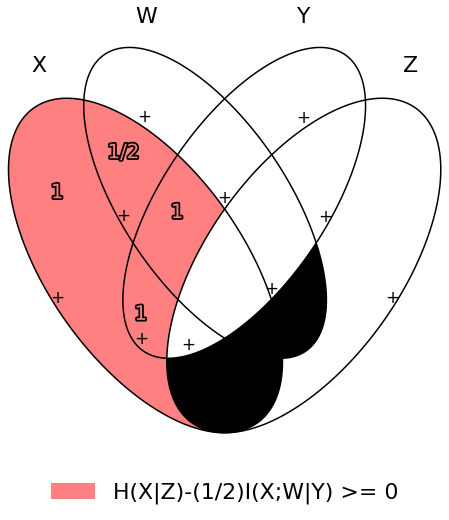

In [5]:
# Information diagram that shows the above implication
(markov(X+W, Y, Z) >> (I(X & W | Y) / 2 <= H(X | Z))).venn()

In [6]:
# Disprove an implication by a counterexample
(markov(X+W, Y, Z) >> (I(X & W | Y) * 3 / 2 <= H(X | Z))).solve(full=True)

((  markov(X+W, Y, Z)  )
>> (  (3/2)*I(X&W|Y) <= H(X|Z)  )) is False

P(X+W+Y) = tensor([[[0.0000, 0.5000],
         [0.0000, 0.0000]],

        [[0.0000, 0.0000],
         [0.0000, 0.5000]]], dtype=torch.float64, grad_fn=<CopySlices>)
P(Z|Y) = tensor([[0.9167, 0.0833],
        [0.6364, 0.3636]], dtype=torch.float64, grad_fn=<CopySlices>)


In [7]:
# The condition "there exists Y independent of X such that 
# X-Y-Z forms a Markov chain" can be simplified to "X,Z independent"
(markov(X, Y, Z) & indep(X, Y)).exists(Y).simplified()

indep(X, Z) 

## Additive combinatorics

In [8]:
A, B, C = rv("A, B, C", alg="abelian")  # Abelian-group-valued RVs

# Entropy of sum (or product) is submodular [Madiman 2008]
(indep(A, B, C) >> (H(A*B*C) + H(B) <= H(A*B) + H(B*C))).solve(full=True)

((  indep(A, B, C)  )
>> (  H(A*B*C)+H(B) <= H(A*B)+H(B*C)  )) is True


H(A*B*C)+H(B)
= I(A*B&A*B*C)+H(A*B*C+A*B|A)   (since H(A*B) == H(B)+I(A*B+A*B*C&A) )
<= H(A*B)+H(A*B*C|A)
= H(A*B)+H(B*C)   (since H(B*C) == H(A*B*C|A) )

In [9]:
# Entropy form of Ruzsa triangle inequality [Ruzsa 1996], [Tao 2010]
(indep(A, B, C) >> (H(A/C) <= H(A/B) + H(B/C) - H(B))).solve(full=True)

((  indep(A, B, C)  )
>> (  H(B)+H(A*C**-1) <= H(A*B**-1)+H(B*C**-1)  )) is True


H(B)+H(A*C**-1)
= H(A+A*B**-1+A*C**-1)-H(A|A*C**-1)   (since H(A*B**-1|A+A*C**-1) == H(B) )
<= H(A*B**-1+A*C**-1)
= H(A*B**-1+B*C**-1)   (since H(A*B**-1+B*C**-1) == H(A*B**-1+A*C**-1) )
<= H(A*B**-1)+H(B*C**-1)

## User-defined information quantities

In [10]:
# Define Gács-Körner common information [Gács-Körner 1973]
gkci = ((H(V|X) == 0) & (H(V|Y) == 0)).maximum(H(V), V)

# Define Wyner's common information [Wyner 1975]
wci = markov(X, U, Y).minimum(I(U & X+Y), U)

# Define common entropy [Kumar-Li-El Gamal 2014]
eci = markov(X, U, Y).minimum(H(U), U)

In [11]:
(gkci <= I(X & Y)).solve()        # Gács-Körner <= I(X;Y)

(( ( H(V|X) == 0 )
 &( H(V|Y) == 0 ) ).exists(V)).maximum(H(V)) <= I(X&Y)  is True

In [12]:
(I(X & Y) <= wci).solve()         # I(X;Y) <= Wyner

I(X&Y) <= (( ( markov(X, U, Y) ) ).exists(U)).minimum(I(U&X+Y))  is True

In [13]:
(wci <= emin(H(X), H(Y))).solve() # Wyner <= min(H(X),H(Y))

(( ( markov(X, U, Y) ) ).exists(U)).minimum(I(U&X+Y)) <= emin(H(X), H(Y))  is True
CompArray(
[[U, X],
 [U, Y]])

In [14]:
(gkci <= wci).solve(full=True) # Output proof of Gács-Körner <= Wyner

(( ( H(V|X) == 0 )
 &( H(V|Y) == 0 ) ).exists(V)).maximum(H(V)) <= (( ( markov(X, U, Y) ) ).exists(U)).minimum(I(U&X+Y))  is True


1. Claim:
(( ( H(V|X) == 0 )
 &( H(V|Y) == 0 ) ).exists(V)).maximum(H(V)) <= (( ( markov(X, U, Y) ) ).exists(U)).minimum(I(U&X+Y)) 

  1.1. Steps: 
  ({ H(V|X) == 0,
  H(V|Y) == 0 } , exists V).maximum(H(V))_L
  <= H(V)   (since at optimum: ({ H(V|X) == 0,
  H(V|Y) == 0 } , exists V).maximum(H(V))_L <= H(V) )
  = I(V&Y)   (since H(V|Y) == 0 )
  <= I(V+X&Y)
  = I(X&Y)   (since markov(V, X, Y) )
  <= I(U+Y&X)
  = I(U&X)   (since markov(Y, U, X) )
  <= I(U&X+Y)
  <= ({ markov(X, U, Y) } , exists U).minimum(I(U;X,Y))_U
          (since at optimum: ({ markov(X, U, Y) } , exists U).minimum(I(U;X,Y))_U >= I(U&X+Y) )

In [15]:
# Automatically discover inequalities among quantities
universe().discover([X, Y, gkci, wci, eci])

( ( (( ( markov(X, U, Y) ) ).exists(U)).minimum(H(U)) <= H(X) )
 &( (( ( markov(X, U, Y) ) ).exists(U)).minimum(H(U)) <= H(Y) )
 &( I(X&Y) <= (( ( markov(X, U, Y) ) ).exists(U)).minimum(I(U&X+Y)) )
 &( (( ( H(V|X) == 0 )
 &( H(V|Y) == 0 ) ).exists(V)).maximum(H(V)) >= 0 )
 &( (( ( H(V|X) == 0 )
 &( H(V|Y) == 0 ) ).exists(V)).maximum(H(V)) <= I(X&Y) )
 &( (( ( markov(X, U, Y) ) ).exists(U)).minimum(I(U&X+Y)) <= (( ( markov(X, U, Y) ) ).exists(U)).minimum(H(U)) ) )

## Automatic inner/outer bound for degraded broadcast channel

In [16]:
X, Y, Z = rv("X, Y, Z")
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

model = CodingModel()
model.add_node(M1+M2, X, label="Enc")  # Encoder maps M1,M2 to X
model.add_edge(X, Y)                   # Channel X -> Y -> Z
model.add_edge(Y, Z)
model.add_node(Y, M1, label="Dec 1")   # Decoder1 maps Y to M1
model.add_node(Z, M2, label="Dec 2")   # Decoder2 maps Z to M2
model.set_rate(M1, R1)                 # Rate of M1 is R1
model.set_rate(M2, R2)                 # Rate of M2 is R2

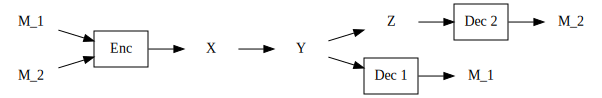

In [17]:
model.graph()             # Draw diagram

In [18]:
# Inner bound via [Lee-Chung 2015], give superposition region [Bergmans 1973], [Gallager 1974]
r = model.get_inner(is_proof=True)  # Display codebook, encoding and decoding info
r.display(note=True)

<IPython.core.display.Math object>

In [19]:
# Automatic outer bound with 1 auxiliary, gives superposition region
model.get_outer(1)

( ( R_1 >= 0 )
 &( R_2 >= 0 )
 &( R_2 <= I(A&Z) )
 &( R_1 <= I(X&Y|A) )
 &( markov(A, X, Y, Z) ) ).exists(A)

In [20]:
# Converse proof, print auxiliary random variables
(model.get_outer() >> r).solve(display_reg=False)

True
CompArray(
[[A_M_2, Y_P+M_2]])

In [21]:
# Output the converse proof
(model.get_outer(is_proof = True) >> r).proof()

In [22]:
r.maximum(R1 + R2, [R1, R2])          # Max sum rate

(markov(X, Y, Z) ).maximum(I(X&Y))

In [23]:
r.maximum(emin(R1, R2), [R1, R2])     # Max symmetric rate

(( ( max59820(min(R_1, R_2)) <= I(A_M_2&Z) )
 &( 2*max59820(min(R_1, R_2)) <= I(A_M_2&Z)+I(X&Y|A_M_2) )
 &( markov(A_M_2, X, Y, Z) ) ).exists(A_M_2)).maximum(max59820(min(R_1, R_2)))

In [24]:
r.exists(R1)   # Eliminate R1, same as r.projected(R2)

( ( R_2 >= 0 )
 &( R_2 <= I(X&Z) )
 &( markov(X, Y, Z) ) )

In [25]:
# Eliminate Z, i.e., taking union of the region over all choices of Z
# The program correctly deduces that it suffices to consider Z = Y
r.exists(Z).simplified()

( ( R_1 >= 0 )
 &( R_2 >= 0 )
 &( R_1+R_2 <= I(X&Y) ) )

## Non-Shannon-type Inequalities

In [26]:
# Zhang-Yeung inequality [Zhang-Yeung 1998] cannot be proved by Shannon-type inequalities
(2*I(Z&W) <= I(X&Y) + I(X & Z+W) + 3*I(Z&W | X) + I(Z&W | Y)).solve()

2*I(Z&W) <= I(X&Y)+I(X&Z+W)+3*I(Z&W|X)+I(Z&W|Y)  is Unknown

In [27]:
# Using copy lemma [Zhang-Yeung 1998], [Dougherty-Freiling-Zeger 2011]
# You may use the built-in "with copylem().assumed():" instead of the below
with eqdist([X, Y, U], [X, Y, Z]).exists(U).forall(X+Y+Z).assumed():
    
    # Prove Zhang-Yeung inequality, and print how the copy lemma is used
    display((2*I(Z&W) <= I(X&Y) + I(X & Z+W) + 3*I(Z&W | X) + I(Z&W | Y)).solve())

2*I(Z&W) <= I(X&Y)+I(X&Z+W)+3*I(Z&W|X)+I(Z&W|Y)  is True
CompArray(
[[X_1, X],
 [Y_1, Z],
 [Z_1, W]])

In [28]:
# State the copy lemma
r = eqdist([X, Y, U], [X, Y, Z]).exists(U)

# Automatically discover non-Shannon-type inequalities using copy lemma
r.discover([X, Y, Z, W]).simplified()

( ( I(W&X&Z) <= 2*I(X&Z|Y)+I(W&Y)+I(X&Y|Z)+I(Y&Z|X) )
 &( I(W&Y&Z) <= 2*I(Y&Z|X)+I(W&X)+I(X&Y|Z)+I(X&Z|Y) )
 &( I(X&Y&Z) <= I(W&Z)+I(X&Y|W)+I(X&Y|Z)+I(X&Z|Y)+I(Y&Z|X) ) )

### References
Refer to https://github.com/cheuktingli/psitip#references 

- Madiman, Mokshay. "On the entropy of sums." 2008 IEEE Information Theory Workshop. IEEE, 2008.

- Ruzsa, Imre Z. "Sums of finite sets." Number Theory: New York Seminar 1991-1995. Springer, New York, NY, 1996.

- Tao, Terence. "Sumset and inverse sumset theory for Shannon entropy." Combinatorics, Probability and Computing 19.4 (2010): 603-639.

- Peter Gacs and Janos Korner. Common information is far less than mutual information.Problems of Control and Information Theory, 2(2):149-162, 1973.

- A. D. Wyner. The common information of two dependent random variables. IEEE Trans. Info. Theory, 21(2):163-179, 1975.

- G. R. Kumar, C. T. Li, and A. El Gamal, "Exact common information," in Proc. IEEE Symp. Info. Theory. IEEE, 2014, pp. 161-165.

- Si-Hyeon Lee and Sae-Young Chung, "A unified approach for network information theory," 2015 IEEE International Symposium on Information Theory (ISIT), IEEE, 2015.

- Bergmans, P. "Random coding theorem for broadcast channels with degraded components." IEEE Transactions on Information Theory 19.2 (1973): 197-207.

- Gallager, Robert G. "Capacity and coding for degraded broadcast channels." Problemy  Peredachi Informatsii 10.3 (1974): 3-14.

- Z. Zhang and R. W. Yeung, "On characterization of entropy function via information inequalities," IEEE Trans. Inform. Theory, vol. 44, pp. 1440-1452, Jul 1998.

- Randall Dougherty, Chris Freiling, and Kenneth Zeger. "Non-Shannon information inequalities in four random variables." arXiv preprint arXiv:1104.3602 (2011).
